In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import pandas as pd
df=pd.read_csv('seattle-weather.csv')


In [5]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [6]:
df.isna().any()

date             False
precipitation    False
temp_max         False
temp_min         False
wind             False
weather          False
dtype: bool

c:\Users\saidi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


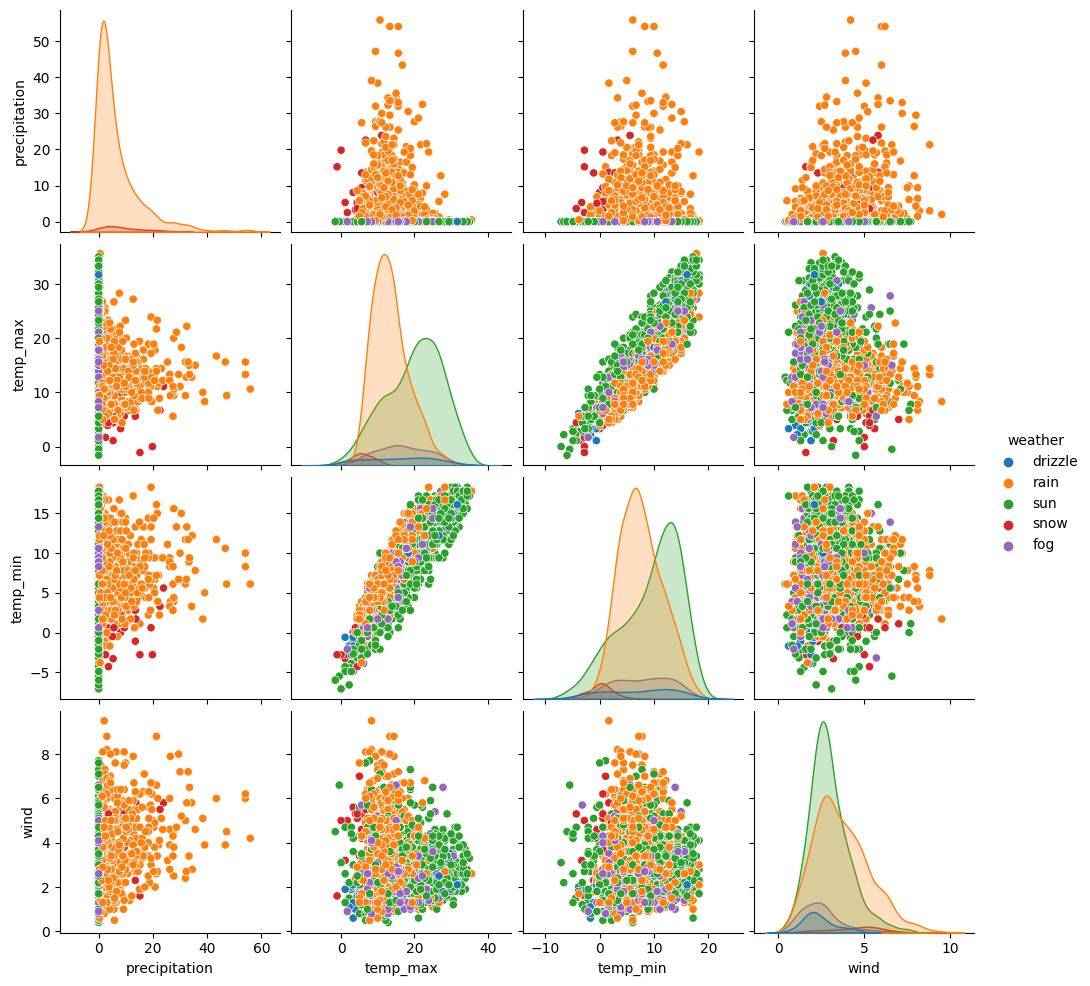

In [7]:
sns.pairplot(data=df,hue='weather')

<Axes: xlabel='weather', ylabel='count'>

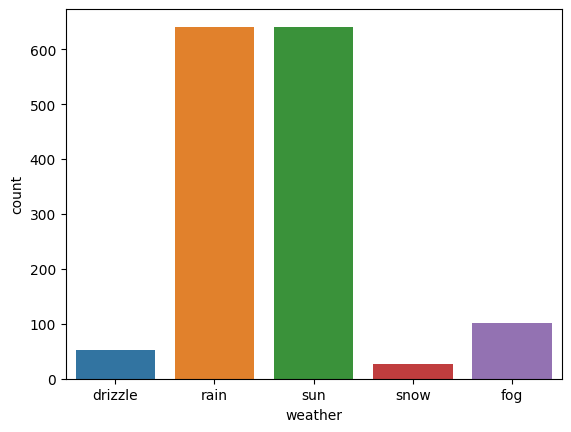

In [8]:
sns.countplot(data=df, x='weather')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [10]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


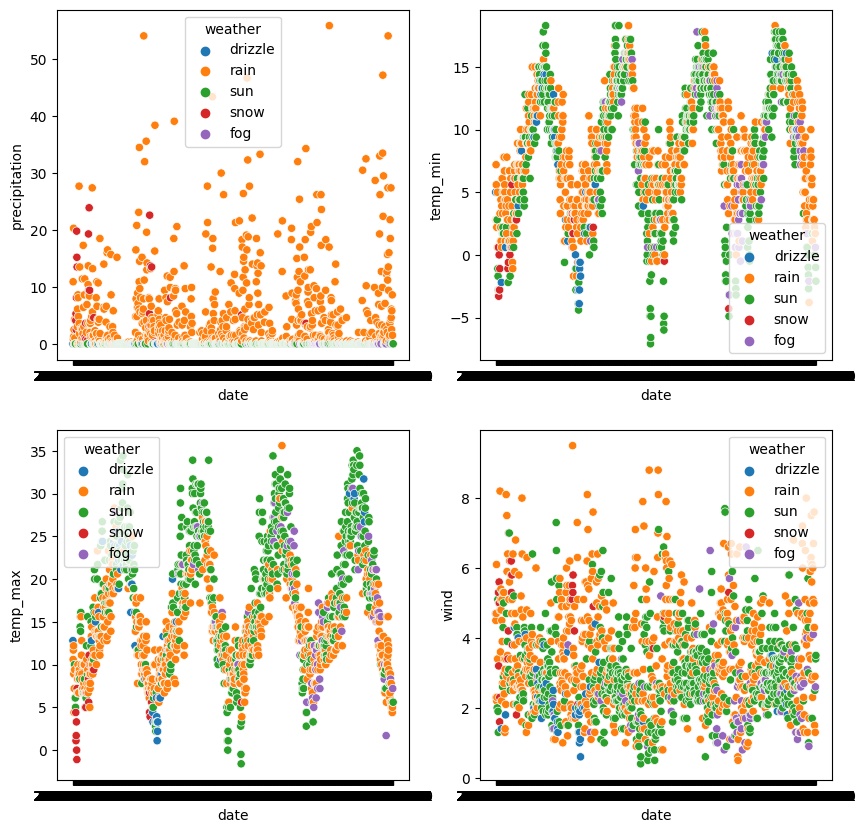

In [11]:
fig,axes = plt.subplots(2,2, figsize=(10,10))
cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
for i in range(4):
    sns.scatterplot(data=df, x='date', y=cols[i], hue='weather', ax=axes[i%2,i//2])

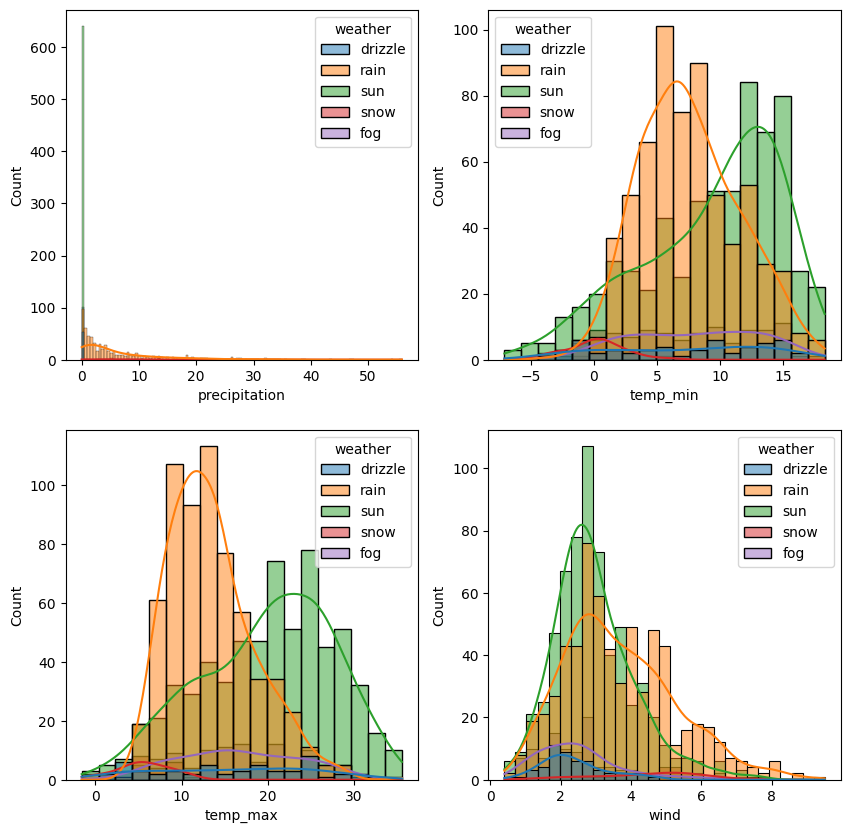

In [12]:
fig.clear()
fig,axes = plt.subplots(2,2, figsize=(10,10))
for i in range(4):
    sns.histplot(kde=True, data=df, x=cols[i], hue='weather', ax= axes[i%2, i//2])

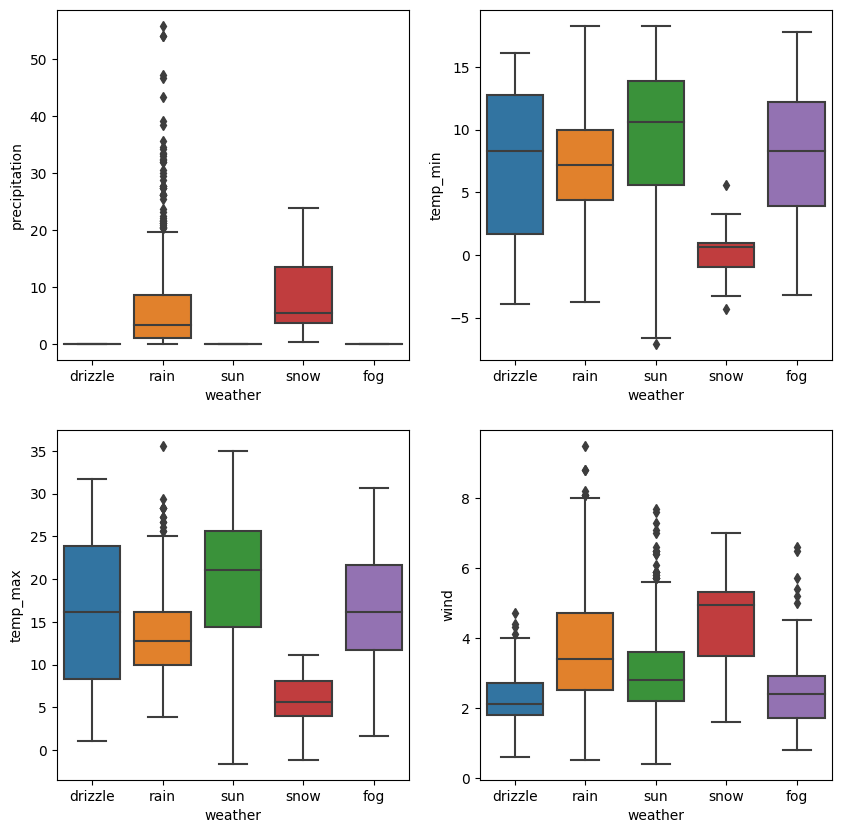

In [13]:
fig,axes = plt.subplots(2,2, figsize=(10,10))
cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
for i in range(4):
    sns.boxplot(x='weather', y=cols[i], data=df, ax=axes[i%2,i//2])

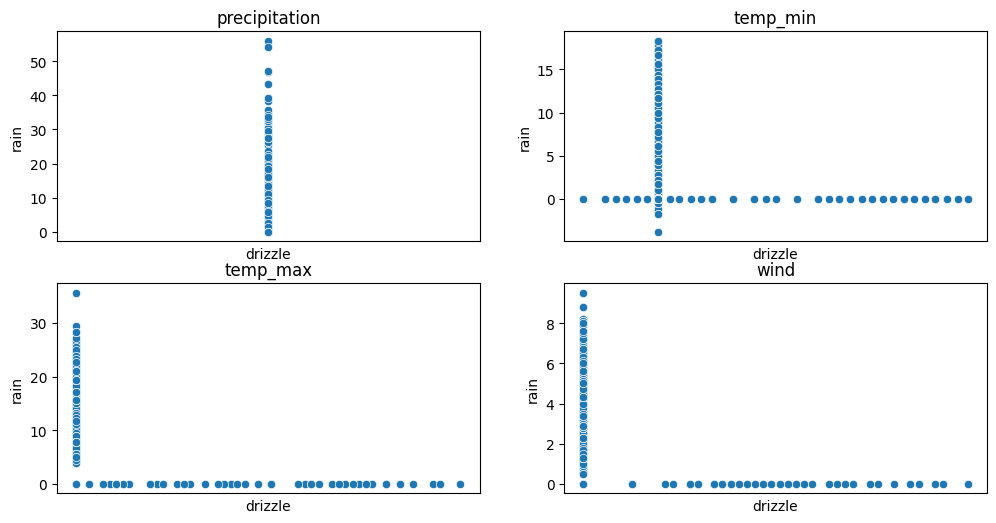

In [14]:
fig, axes = plt.subplots(2,2, figsize=(12,6))
for i in range(len(cols)):
    sns.scatterplot(data=df.pivot(index='date',columns='weather', values=cols[i]).fillna(0), x='drizzle', y='rain', ax=axes[i%2,i//2])
    axes[i%2,i//2].set_title(cols[i])
    axes[i%2,i//2].set_xticks([])
plt.show()

In [15]:
countrain=len(df[df.weather=="rain"])
countsun=len(df[df.weather=="sun"])
countdrizzle=len(df[df.weather=="drizzle"])
countsnow=len(df[df.weather=="snow"])
countfog=len(df[df.weather=="fog"])
print("Percent of Rain:{:2f}%".format((countrain/(len(df.weather))*100)))
print("Percent of Sun:{:2f}%".format((countsun/(len(df.weather))*100)))
print("Percent of Drizzle:{:2f}%".format((countdrizzle/(len(df.weather))*100)))
print("Percent of Snow:{:2f}%".format((countsnow/(len(df.weather))*100)))
print("Percent of Fog:{:2f}%".format((countfog/(len(df.weather))*100)))

Percent of Rain:43.874059%
Percent of Sun:43.805613%
Percent of Drizzle:3.627652%
Percent of Snow:1.779603%
Percent of Fog:6.913073%


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import missingno as mso
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [17]:
lc=LabelEncoder()# Scaling the weather variables using label Encoder:
df["weather"]=lc.fit_transform(df["weather"])

In [18]:
df=df.drop(["date"],axis=1) #preprocessing
df.head()

,precipitation,temp_max,temp_min,wind,weather
typing.Literal[<no_default>],,,,,
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2


In [19]:
x=((df.loc[:,df.columns!="weather"]).astype(int)).values[:,0:]
y=df["weather"].values
df.weather.unique()

array([0, 2, 4, 3, 1])

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [21]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(x_test,y_test)*100))

KNN Accuracy:76.87%


In [22]:
svm=SVC()
svm.fit(x_train,y_train)
print("SVM Accuracy:{:.2f}%".format(svm.score(x_test,y_test)*100))

SVM Accuracy:77.55%


In [23]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
print("Gradient Boosting Accuracy:{:.2f}%".format(gbc.score(x_test,y_test)*100))

Gradient Boosting Accuracy:80.95%


In [24]:
import warnings
warnings.filterwarnings('ignore')
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print("XGB Accuracy:{:.2f}%".format(xgb.score(x_test,y_test)*100))

[19:40:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Accuracy:78.23%


In [26]:
input=[[1.140175,8.9,2.8,2.469818]]
ot=gbc.predict(input)
print("The weather is:")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("snow")
else:
    print("Sun")

The weather is:
Rain


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression()
rf = RandomForestClassifier(bootstrap=False)
gbc = GradientBoostingClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
knn= KNeighborsClassifier()

In [28]:
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
gbc.fit(x_train,y_train)
dt.fit(x_train,y_train)
svc.fit(x_train, y_train)
knn.fit(x_train, y_train)


y_pred_lr = lr.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_gbc = gbc.predict(x_test)
y_pred_dt = dt.predict(x_test)
y_pred_svc = svc.predict(x_test)
y_pred_knn = knn.predict(x_test)
print('LogReg Accuracy = {:.2f}'.format(lr.score(x_test,y_test)*100))
print('RandFor Accuracy = {:.2f}'.format(rf.score(x_test,y_test)*100))
print('GBC Accuracy = {:.2f}'.format(gbc.score(x_test,y_test)*100))
print('DT Accuracy = {:.2f}'.format(dt.score(x_test,y_test)*100))
print('SVC Accuracy = {:.2f}'.format(svc.score(x_test,y_test)*100))
print('KNN Accuracy = {:.2f}'.format(knn.score(x_test,y_test)*100))

LogReg Accuracy = 80.95
RandFor Accuracy = 72.79
GBC Accuracy = 80.95
DT Accuracy = 70.07
SVC Accuracy = 77.55
KNN Accuracy = 76.87


In [29]:
from sklearn.metrics import confusion_matrix

print('LogReg\n',confusion_matrix(y_pred_lr,y_test))
print('RandFor\n', confusion_matrix(y_pred_rf,y_test))
print('GBC\n', confusion_matrix(y_pred_gbc, y_test))

LogReg
 [[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 1  0 65  3  0]
 [ 0  0  0  2  0]
 [ 4  5 14  1 52]]
RandFor
 [[ 0  0  0  0  3]
 [ 2  1  1  1  5]
 [ 0  1 66  1  8]
 [ 0  0  1  4  0]
 [ 3  3 11  0 36]]
GBC
 [[ 0  0  0  0  0]
 [ 1  1  0  0  1]
 [ 0  0 64  1  1]
 [ 0  0  1  4  0]
 [ 4  4 14  1 50]]


In [30]:
from sklearn.metrics import classification_report

print('LogReg\n',classification_report(y_test,y_pred_lr, zero_division=0))
print('GBC\n',classification_report(y_test,y_pred_gbc, zero_division=0))
print('RF\n',classification_report(y_test,y_pred_rf, zero_division=0))
print('DT\n',classification_report(y_test,y_pred_dt, zero_division=0))
print('KNN\n',classification_report(y_test,y_pred_knn, zero_division=0))

LogReg
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.94      0.82      0.88        79
           3       1.00      0.33      0.50         6
           4       0.68      1.00      0.81        52

    accuracy                           0.81       147
   macro avg       0.53      0.43      0.44       147
weighted avg       0.79      0.81      0.78       147

GBC
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.33      0.20      0.25         5
           2       0.97      0.81      0.88        79
           3       0.80      0.67      0.73         6
           4       0.68      0.96      0.80        52

    accuracy                           0.81       147
   macro avg       0.56      0.53      0.53       147
weighted avg       0.81      0.81      0.80       147

RF
      

In [31]:
# Model training
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

# Model evaluation
accuracy = gbc.score(x_test, y_test)
print("Gradient Boosting Accuracy: {:.2f}%".format(accuracy * 100))

Gradient Boosting Accuracy: 80.95%


In [32]:
#save the model
import joblib
joblib.dump(gbc,'weather_model.pkl')

['weather_model.pkl']

In [33]:
#save the scaler
joblib.dump(lc,'scaler.pkl')

['scaler.pkl']

In [36]:
import joblib

# Load the model and scaler
model = joblib.load('weather_model.pkl')
scaler = joblib.load('scaler.pkl')

# Take user inputs
precipitation = float(input("Enter the precipitation: "))
temp_max = float(input("Enter the max temperature: "))
temp_min = float(input("Enter the min temperature: "))
wind = float(input("Enter the wind: "))

# Prepare input for prediction
user_input = [[precipitation, temp_max, temp_min, wind]]
user_input_scaled = scaler.transform(user_input)

# Predict the weather
output = model.predict(user_input_scaled)
if output == 0:
    print("The weather is Drizzle")
elif output == 1:
    print("The weather is Fog")
elif output == 2:
    print("The weather is Rain")
elif output == 3:
    print("The weather is Snow")
else:
    print("The weather is Sun")

TypeError: 'list' object is not callable

In [37]:
import joblib

# Save the trained model to a file
joblib.dump(gbc, 'gradient_boosting_model.pkl')
print("Model saved as 'gradient_boosting_model.pkl'")

Model saved as 'gradient_boosting_model.pkl'


In [43]:
# Load the saved model
loaded_model = joblib.load('gradient_boosting_model.pkl')

# Example real-time input for prediction
real_time_input = [[1, 8, 2.8, 2.9]]

# Get probabilities for each class
class_probabilities = loaded_model.predict_proba(real_time_input)

# Map probabilities to weather classes
weather_classes = {0: "Drizzle", 1: "Fog", 2: "Rain", 3: "Snow", 4: "Sun"}
for i, prob in enumerate(class_probabilities[0]):
    print(f"Probability of {weather_classes[i]}: {prob:.2f}")

Probability of Drizzle: 0.00
Probability of Fog: 0.00
Probability of Rain: 1.00
Probability of Snow: 0.00
Probability of Sun: 0.00
